In [26]:
# prompt: import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#from sklearn.tree import export_graphviz
#import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
base = pd.read_csv('insurance.csv')
base.head()

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [4]:
base.drop(columns = ['Unnamed: 0'])

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,False,Adult,Middle,Adventurous,Older,NaN,Football,NaN,FamilySedan,Normal,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,One
16276,False,Senior,Prole,Cautious,Older,NaN,EggShell,NaN,Economy,Normal,...,City,True,TenThou,Thousand,False,Thousand,Poor,False,Thousand,Zero
16277,False,Senior,Middle,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,Suburb,False,HundredThou,HundredThou,True,HundredThou,Poor,False,Thousand,Many
16278,False,Adult,Prole,Cautious,Older,NaN,EggShell,NaN,Economy,Excellent,...,Rural,False,Thousand,Thousand,False,Thousand,Fair,False,Thousand,Zero


In [30]:
y = base.iloc[:, 8].values
columns = []
for i in range(27):
  if i != 8:
    columns.append(i)
X = base.iloc[:, columns].values

for i in range(len(y)):
  if type(y[i]) == float:
    y[i] = 'None'
y

array(['Mild', 'None', 'None', ..., 'Severe', 'None', 'None'],
      dtype=object)

In [31]:
labelEncoder = LabelEncoder()
for i in range(X.shape[1]):
  if X[:, i].dtype == 'object':
    X[:, i] = labelEncoder.fit_transform(X[:,i])

In [32]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

In [42]:
#94
#modelo = RandomForestClassifier(random_state=1, n_estimators=100)
modelo = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=16)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=16, random_state=1)

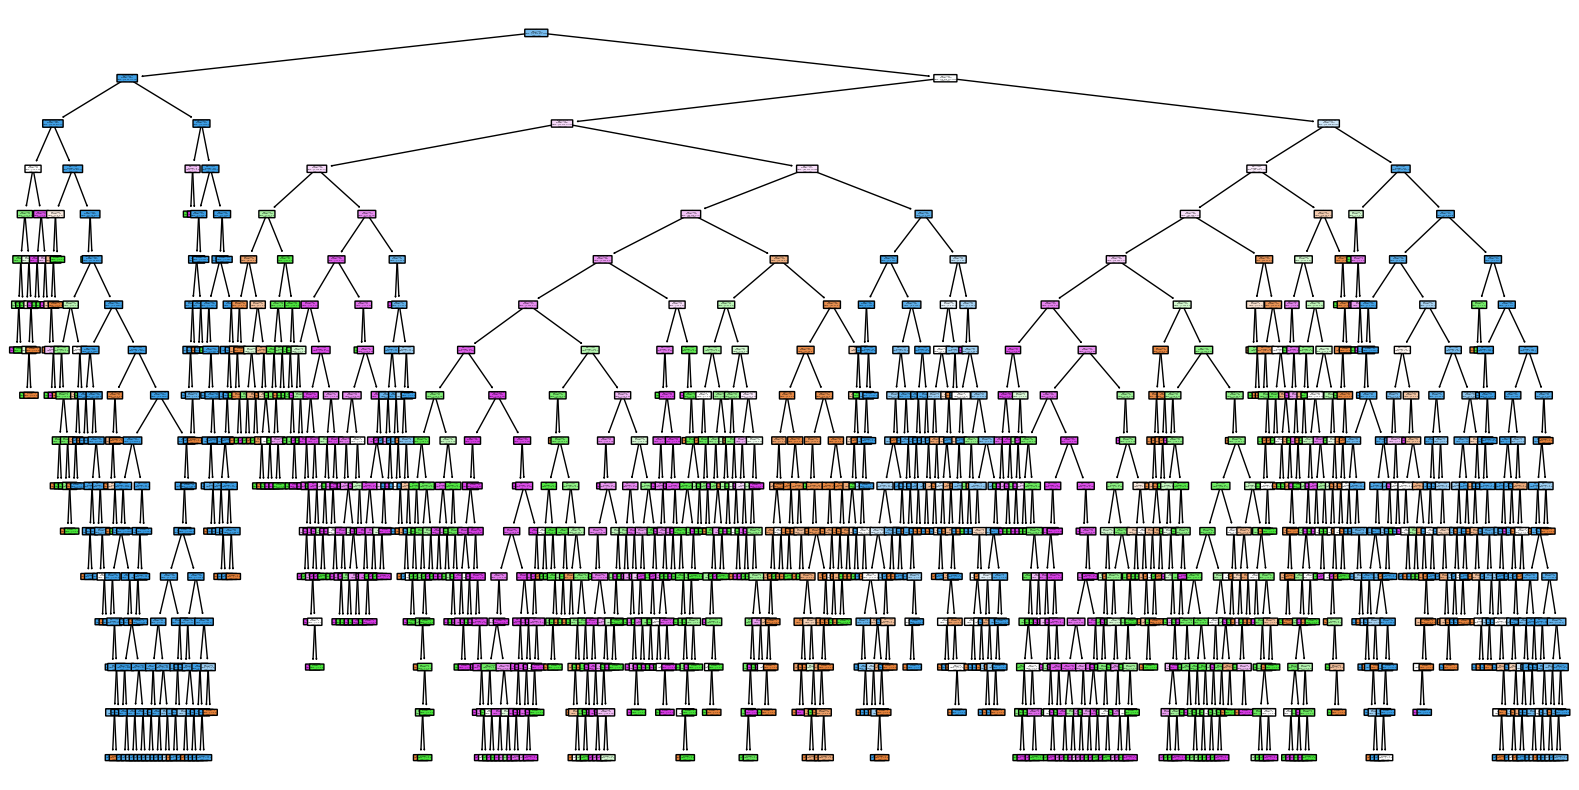

In [45]:
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[columns], class_names=True, rounded=True)
plt.show()

In [43]:
previsoes = modelo.predict(X_teste)

In [44]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')

print(f'acuracia: {accuracy}, precisao: {precision}, recall: {recall}, f1: {f1}')

acuracia: 0.9451269451269452, precisao: 0.9439348511105942, recall: 0.9451269451269452, f1: 0.9436597124008962


In [36]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.87      0.72      0.78       418
    Moderate       0.74      0.76      0.75       366
        None       0.98      1.00      0.99      3548
      Severe       0.89      0.90      0.89       552

    accuracy                           0.94      4884
   macro avg       0.87      0.84      0.85      4884
weighted avg       0.94      0.94      0.94      4884

